In [1]:
import os
import natsort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Parameters
T = 30

# Load data.
root_path = 'examples/varying_t0_D/'
data_file = '/reports/mse_models.csv'

mse_set = []
ratio_t_t0 = []
for filename in natsort.natsorted(os.listdir(root_path)):
    #print(filename)
    mse_data = pd.read_csv(root_path + filename + data_file)
    ratio = (T - mse_data.shape[0]) / T
    mse_set.append(mse_data)
    ratio_t_t0.append(ratio)

ratio_t_t0 = np.around(ratio_t_t0, decimals=2)

In [3]:
# Analysis: calculate means of mses for each method.
mse_means_array = np.zeros((len(mse_set), mse_set[0].shape[1]))
for index, data in enumerate(mse_set):
    mse_means_array[index,:] = data.mean().values

# Convert to pd.DataFrame
mse_means_df = pd.DataFrame(mse_means_array, columns=mse_set[0].columns, index=ratio_t_t0).reset_index().rename({'index': 'ratio'}, axis=1)

# Take log for comparison.
mse_means_df_noratio = mse_means_df.iloc[:,1:]
mse_means_log_df = np.log(mse_means_df)
mse_means_log_df['ratio'] = mse_means_df['ratio']

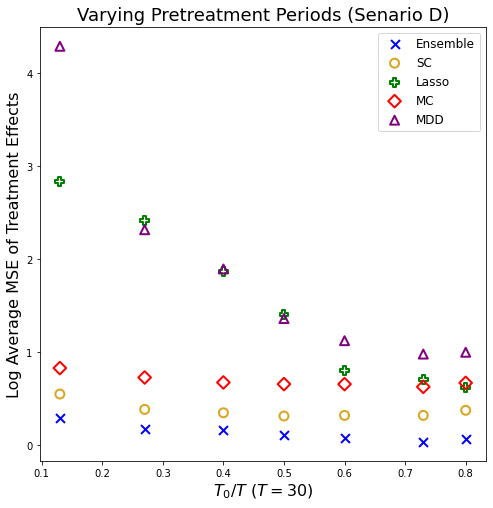

In [4]:
# Visualization.
fig, ax = plt.subplots(figsize=(8, 8))

mse_means_log_df.plot.scatter(x='ratio', y='Ensemble', color='blue', marker='x', linewidth=2, s=80, ax=ax, label='Ensemble')
mse_means_log_df.plot.scatter(x='ratio', y='SC', c='none', edgecolors='goldenrod', marker='o', linewidth=2, s=80, ax=ax, label='SC')
mse_means_log_df.plot.scatter(x='ratio', y='Lasso', c='none', edgecolors='green', marker='P', linewidth=2, s=80, ax=ax, label='Lasso')
mse_means_log_df.plot.scatter(x='ratio', y='MC', c='none', edgecolors='red', marker='D', linewidth=2, s=80, ax=ax, label='MC')
mse_means_log_df.plot.scatter(x='ratio', y='MDD', c='none', edgecolors='purple', marker='^', linewidth=2, s=80, ax=ax, label='MDD')

ax.set_xlabel('$T_0/T$ ($T=30$)', fontsize=16)
ax.set_ylabel('Log Average MSE of Treatment Effects', fontsize=16)
ax.set_title('Varying Pretreatment Periods (Senario D)', fontsize=18)
ax.legend(fontsize=12)

fig.savefig('examples/varing_t0_D.png')